In [2]:
import numpy as np

np.random.choice([0,1], size=3)

array([0, 0, 1])

In [4]:
np.random.seed(123)
np.random.choice([0,1], size=10)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [13]:
# 30% chance son takes a nap on weekend; 1=nap, 0=no nap
np.random.seed(3)

naps = np.random.choice([0, 1], p=[.7, .3], size=(10_000, 2))
naps

array([[0, 1],
       [0, 0],
       [1, 1],
       ...,
       [0, 0],
       [1, 0],
       [1, 1]])

In [14]:
# aggregate by row
n_naps = naps.sum(axis=1)
n_naps

array([1, 0, 2, ..., 0, 1, 2])

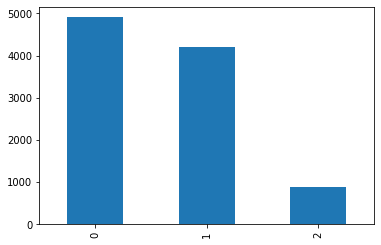

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.Series(n_naps).value_counts().plot.bar()

In [16]:
(n_naps >= 1).mean()

0.5095

In [17]:
(n_naps == 0).mean()

0.4905

In [19]:
# prob of getting at least one 3 in 3 dice rolls

rolls = np.random.choice([1, 2, 3, 4, 5, 6], (10_001, 3))
rolls

array([[4, 5, 4],
       [2, 1, 4],
       [2, 3, 3],
       ...,
       [2, 4, 2],
       [2, 2, 1],
       [6, 1, 5]])

In [21]:
(rolls == 3).sum(axis=1)

array([0, 0, 2, ..., 0, 0, 0])

In [22]:
(rolls == 3).sum(axis=1) >= 1

array([False, False,  True, ..., False, False, False])

In [23]:
((rolls == 3).sum(axis=1) >= 1).mean()

0.41555844415558446

In [25]:
# same as above but in a dataframe

df = pd.DataFrame(rolls)
df

,0,1,2
0,4,5,4
1,2,1,4
2,2,3,3
3,6,2,5
4,6,2,6
...,...,...,...
9996,6,3,4
9997,1,6,2
9998,2,4,2
9999,2,2,1


In [27]:
3 in [1, 2, 3]

True

In [28]:
3 in [1, 2, 4]

False

In [26]:
def contains_a_3(rolls: pd.Series) -> bool:
    return 3 in rolls.values
    
assert contains_a_3(pd.Series([1, 2, 3])) == True
assert contains_a_3(pd.Series([1, 2, 4])) == False

In [29]:
df.apply(contains_a_3, axis=1)

0        False
1        False
2         True
3        False
4        False
         ...  
9996      True
9997     False
9998     False
9999     False
10000    False
Length: 10001, dtype: bool

In [30]:
df.apply(contains_a_3, axis=1).mean()

0.41555844415558446